In [1]:
from ast import Break
import os
from unicodedata import category 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import pickle 
import random
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC

In [2]:
dir = 'D:\\3rd Year Mini Project\\Implementation\\dataset\\dataset\\resized'

In [3]:
categories=['alfalfa',
'allium',
'borage',
'burdock',
'calendula',
'cattail',
'chickweed',
'chicory',
'chive_blossom',
'coltsfoot',
'common_mallow',
'common_milkweed',
'common_vetch',
'common_yarrow',
'coneflower',
'cow_parsley',
'cowslip',
'crimson_clover',
'crithmum_maritimum',
'daisy',
'dandelion',
'fennel',
'fireweed',
'gardenia',
'garlic_mustard',
'geranium',
'ground_ivy',
'harebell',
'henbit',
'knapweed',
'meadowsweet',
'mullein',
'pickerelweed',
'ramsons',
'red_clover'
]

In [4]:
data = []

In [5]:
for category in categories: 
    path = os.path.join(dir, category) 
    label= categories.index(category)

    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        image=cv2.imread(imgpath,0)
        # cv2.imshow('image',pet_img)
        try:
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image=cv2.resize(image,(224,224))
            image = np.array(image).flatten()
            # image = np.array(image,dtype=np.float32)

            data.append([image,label])
        except Exception as e:
            pass

In [6]:
pick_in = open('data1.pickle', 'wb') 
pickle.dump(data,pick_in)
pick_in.close()




In [7]:
pick_in = open('data1.pickle', 'rb') 
data=pickle.load(pick_in)
pick_in.close()

In [8]:
random.shuffle(data) 
features = [] 
labels = []
for feature , label in data:
    features.append(feature) 
    labels.append(label)

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size= 0.1)

In [12]:
model = SVC(C=1, kernel='poly', gamma='auto')
model.fit(xtrain, ytrain)

MemoryError: Unable to allocate 8.83 GiB for an array with shape (7875, 224, 224, 3) and data type float64

In [ ]:
pick 

In [23]:
prediction=model.predict(xtest)
accuracy = model.score(xtest, ytest)

In [26]:
print('accuracy: ', accuracy)

accuracy:  0.128


In [26]:
print('Prediction is : ', categories[prediction[0]])

Prediction is :  common_vetch


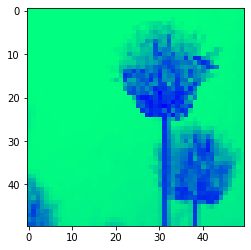

In [28]:
mypet=xtest[0].reshape(50,50)
plt.imshow(mypet, cmap='winter')
plt.show()

In [35]:
xtrain, xtest, ytrain, ytest= train_test_split(features, labels, test_size= 0.25)
# xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size= 0.25)

TypeError: Invalid shape (2500,) for image data

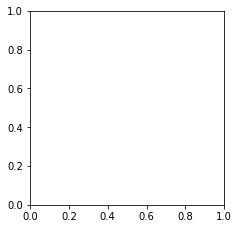

In [34]:
prediction = model.predict(xtest)

plt. figure(figsize=(16,17))

for i in range(16):
	plt.subplot(4,4,i+1) 
	plt.imshow(xtest[i]) 
	plt.xlabel('Actual:'+categories[ytest[i]]+ '\n'+'Predicted:'+
		categories[np.argmax(prediction[i])])
	plt.xticks ([])

plt.show()